# Data Analytics Virtual Experience Program - Quantium

# By - Alok Yadav

## Task -1 Data preparation and customer analytics


In [183]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [184]:
# importing purchase data 
purchase_data = pd.read_csv("D:/dataset/QVI_purchase_behaviour.csv")

In [185]:
purchase_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [186]:
purchase_data.shape

(72637, 3)

#### this data contains three column and 72637 rows 

In [187]:
purchase_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [188]:
purchase_data.isna().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [189]:
# no missing values in this

In [190]:
purchase_data.duplicated().sum() # no duplicate

0

In [191]:
purchase_data['LIFESTAGE'].unique()

array(['YOUNG SINGLES/COUPLES', 'YOUNG FAMILIES', 'OLDER SINGLES/COUPLES',
       'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
       'RETIREES'], dtype=object)

In [192]:
purchase_data['PREMIUM_CUSTOMER'].unique()

array(['Premium', 'Mainstream', 'Budget'], dtype=object)

# Data Preparation for  transaction_data

In [193]:
#importing Transactions data which was in xlsx format
transaction_data = pd.read_excel("D:/dataset/QVI_transaction_data.xlsx")

In [194]:
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [195]:
transaction_data.shape

(264836, 8)

In [196]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [197]:
transaction_data.isna().sum() #no null values

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [198]:
transaction_data.duplicated().sum() # there is one duplicate row in the data

1

In [199]:
# we will remove duplicate row
transaction_data.drop_duplicates(inplace=True) # duplicate row deleting

In [200]:
# let's check againg
transaction_data.duplicated().sum()

0

## Date column is in integer for we will change it in date

In [201]:
import datetime as dt


In [202]:
# converitng integer date in date format
transaction_data['DATE'] = pd.TimedeltaIndex(transaction_data['DATE'], unit='d') + dt.datetime(1899,12,30)

In [203]:
# converitng integer date in date format
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264835 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264835 non-null  datetime64[ns]
 1   STORE_NBR       264835 non-null  int64         
 2   LYLTY_CARD_NBR  264835 non-null  int64         
 3   TXN_ID          264835 non-null  int64         
 4   PROD_NBR        264835 non-null  int64         
 5   PROD_NAME       264835 non-null  object        
 6   PROD_QTY        264835 non-null  int64         
 7   TOT_SALES       264835 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 18.2+ MB


In [204]:
# ger some statistical information
transaction_data.describe()


,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264835.000000,2.648350e+05,2.648350e+05,264835.000000,264835.000000,264835.000000
mean,135.080216,1.355496e+05,1.351584e+05,56.583201,1.907308,7.304205
std,76.784306,8.058011e+04,7.813316e+04,32.826692,0.643655,3.083231
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.000000,7.002100e+04,6.760100e+04,28.000000,2.000000,5.400000
50%,130.000000,1.303580e+05,1.351380e+05,56.000000,2.000000,7.400000
75%,203.000000,2.030945e+05,2.027015e+05,85.000000,2.000000,9.200000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


## Merging the dataset

In [205]:
data = pd.merge(purchase_data,transaction_data,on ='LYLTY_CARD_NBR',how="right")
print(data.head())

   LYLTY_CARD_NBR              LIFESTAGE PREMIUM_CUSTOMER       DATE  \
0            1000  YOUNG SINGLES/COUPLES          Premium 2018-10-17   
1            1002  YOUNG SINGLES/COUPLES       Mainstream 2018-09-16   
2            1003         YOUNG FAMILIES           Budget 2019-03-07   
3            1003         YOUNG FAMILIES           Budget 2019-03-08   
4            1004  OLDER SINGLES/COUPLES       Mainstream 2018-11-02   

   STORE_NBR  TXN_ID  PROD_NBR                               PROD_NAME  \
0          1       1         5  Natural Chip        Compny SeaSalt175g   
1          1       2        58   Red Rock Deli Chikn&Garlic Aioli 150g   
2          1       3        52   Grain Waves Sour    Cream&Chives 210G   
3          1       4       106  Natural ChipCo      Hony Soy Chckn175g   
4          1       5        96          WW Original Stacked Chips 160g   

   PROD_QTY  TOT_SALES  
0         2        6.0  
1         1        2.7  
2         1        3.6  
3         1        3.0

In [206]:
data.shape

(264835, 10)

In [207]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264835 entries, 0 to 264834
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   LYLTY_CARD_NBR    264835 non-null  int64         
 1   LIFESTAGE         264835 non-null  object        
 2   PREMIUM_CUSTOMER  264835 non-null  object        
 3   DATE              264835 non-null  datetime64[ns]
 4   STORE_NBR         264835 non-null  int64         
 5   TXN_ID            264835 non-null  int64         
 6   PROD_NBR          264835 non-null  int64         
 7   PROD_NAME         264835 non-null  object        
 8   PROD_QTY          264835 non-null  int64         
 9   TOT_SALES         264835 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 22.2+ MB


In [208]:
data["PROD_NAME"].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'Red Rock Deli Chikn&Garlic Aioli 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Natural ChipCo      Hony Soy Chckn175g',
       'WW Original Stacked Chips 160g', 'Cheetos Puffs 165g',
       'Infuzions SourCream&Herbs Veg Strws 110g',
       'RRD SR Slow Rst     Pork Belly 150g',
       'Doritos Cheese      Supreme 330g', 'Doritos Mexicana    170g',
       'Old El Paso Salsa   Dip Tomato Med 300g',
       'GrnWves Plus Btroot & Chilli Jam 180g',
       'Smiths Crinkle Cut  Chips Barbecue 170g',
       'Kettle Sensations   Camembert & Fig 150g',
       'Doritos Corn Chip Southern Chicken 150g',
       'CCs Tasty Cheese    175g', 'Tostitos Splash Of  Lime 175g',
       'Kettle 135g Swt Pot Sea Salt', 'RRD Salt & Vinegar  165g',
       'Infuzions Mango     Chutny Papadums 70g',
       'Smiths Crinkle Cut  Snag&Sauce 150g',
       'Smiths Crinkle      Original 330g',
       'RRD Sweet Chilli &  Sour Cream 165g',
     

In [209]:
split_prods = data["PROD_NAME"].str.replace(r'([0-9]+[gG])','').str.replace(r'[^\w]', ' ').str.split()

In [210]:
print(split_prods)

0                    [Natural, Chip, Compny, SeaSalt]
1             [Red, Rock, Deli, Chikn, Garlic, Aioli]
2                 [Grain, Waves, Sour, Cream, Chives]
3                 [Natural, ChipCo, Hony, Soy, Chckn]
4                      [WW, Original, Stacked, Chips]
                             ...                     
264830                  [Grain, Waves, Sweet, Chilli]
264831           [Kettle, Tortilla, ChpsFeta, Garlic]
264832            [Tyrrells, Crisps, Lightly, Salted]
264833    [Old, El, Paso, Salsa, Dip, Chnky, Tom, Ht]
264834        [Smiths, Crinkle, Chips, Salt, Vinegar]
Name: PROD_NAME, Length: 264835, dtype: object


In [211]:
word_counts = {}

def count_words(line):
    for word in line:
        if word not in word_counts:
            word_counts[word] = 1
        else:
            word_counts[word] += 1
            
split_prods.apply(lambda line: count_words(line))
print(pd.Series(word_counts).sort_values(ascending=False))

Chips     49770
Kettle    41288
Smiths    28859
Salt      27976
Cheese    27890
          ...  
Onin       1432
Pc         1431
Garden     1419
NCC        1419
Fries      1418
Length: 198, dtype: int64


In dataset there is one product is of salsa and which is 
not comes in chipa category so we will remove that

In [212]:
# removing salsa from dataset
data =data[~data["PROD_NAME"].str.contains(r"[Ss]alsa")]

In [213]:
print(data.describe(), '\n')
print(data.info())

       LYLTY_CARD_NBR      STORE_NBR        TXN_ID       PROD_NBR  \
count    2.467410e+05  246741.000000  2.467410e+05  246741.000000   
mean     1.355311e+05     135.051212  1.351312e+05      56.351835   
std      8.071542e+04      76.787231  7.814786e+04      33.695488   
min      1.000000e+03       1.000000  1.000000e+00       1.000000   
25%      7.001500e+04      70.000000  6.756900e+04      26.000000   
50%      1.303670e+05     130.000000  1.351840e+05      53.000000   
75%      2.030840e+05     203.000000  2.026540e+05      87.000000   
max      2.373711e+06     272.000000  2.415841e+06     114.000000   

            PROD_QTY      TOT_SALES  
count  246741.000000  246741.000000  
mean        1.908061       7.321328  
std         0.659832       3.077833  
min         1.000000       1.700000  
25%         2.000000       5.800000  
50%         2.000000       7.400000  
75%         2.000000       8.800000  
max       200.000000     650.000000   

<class 'pandas.core.frame.DataFram

In [214]:
# let see outlier in Prod_quantity column
data['PROD_QTY'].value_counts(bins=4).sort_index()

(0.8, 50.75]       246739
(50.75, 100.5]          0
(100.5, 150.25]         0
(150.25, 200.0]         2
Name: PROD_QTY, dtype: int64

 from above binning we see that PROD_QTY value is above 50.75

In [215]:
data.sort_values(by ="PROD_QTY",ascending =False).head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
221624,226000,OLDER FAMILIES,Premium,2018-08-19,226,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
221625,226000,OLDER FAMILIES,Premium,2019-05-20,226,226210,4,Dorito Corn Chp Supreme 380g,200,650.0
218543,223025,YOUNG FAMILIES,Mainstream,2018-08-15,223,223075,8,Smiths Crinkle Cut Chips Original 170g,5,14.5
91147,94098,YOUNG FAMILIES,Budget,2019-05-18,94,93080,114,Kettle Sensations Siracha Lime 150g,5,23.0
87093,90215,RETIREES,Premium,2018-08-19,90,88934,95,Sunbites Whlegrn Crisps Frch/Onin 90g,5,8.5


In [216]:
# remove outlier
data = data[data["PROD_QTY"] <6]

In [217]:
# date information
data['DATE'].describe()

count                  246739
unique                    364
top       2018-12-24 00:00:00
freq                      865
first     2018-07-01 00:00:00
last      2019-06-30 00:00:00
Name: DATE, dtype: object

In [218]:
# searching missing date
pd.date_range(start=data["DATE"].min(), end=data["DATE"].max()).difference(data["DATE"])


DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

In [219]:
data['DATE'].value_counts().sort_values().head()

2019-06-13    607
2018-09-22    609
2018-11-25    610
2018-10-18    611
2019-06-24    612
Name: DATE, dtype: int64

The date with no transaction falls on Christmas day,the day when the store is close.
knowing there's no anomaly in this ,we leave it be.

count    240675.000000
mean        175.302287
std          60.014592
min          70.000000
25%         150.000000
50%         170.000000
75%         175.000000
max         380.000000
Name: 0, dtype: float64


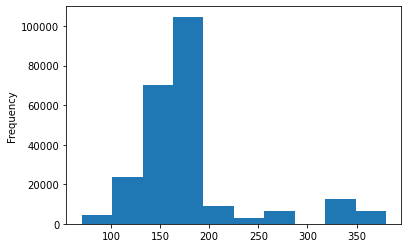

In [220]:
# extracting the pack_size from porduct name column
data["PROD_NAME"] = data["PROD_NAME"].str.replace(r'[0-9]+(G)','g')
pack_sizes = data["PROD_NAME"].str.extract(r'([0-9]+[gG])')[0].str.replace("g","").astype("float")
print(pack_sizes.describe())
pack_sizes.plot.hist()


From above information we can say that the lowest pack is or 70g and highest is 380g

In [221]:
# Different brand names

In [222]:
data['PROD_NAME'].str.split().str[0].value_counts().sort_index()

Burger         1564
CCs            4551
Cheetos        2927
Cheezels       4603
Cobs           9693
Dorito         3183
Doritos       22041
French         1418
Grain          6272
GrnWves        1468
Infuzions     11057
Infzns         3144
Kettle        41288
NCC            1419
Natural        6050
Pringles      25102
RRD           11894
Red            4427
Smith          2963
Smiths        27389
Snbts          1576
Sunbites       1432
Thins         14075
Tostitos       9471
Twisties       9454
Tyrrells       6442
WW            10320
Woolworths     1516
Name: PROD_NAME, dtype: int64

Above we can see that some brands name is written in different ways but they
are same so we will give them same name instead of different.

In [223]:
data["Cleaned_Brand_Names"] = data["PROD_NAME"].str.split().str[0]

In [224]:
def clean_brand_names(line):
    brand = line["Cleaned_Brand_Names"]
    if brand == "Dorito":
        return "Doritos"
    elif brand == "GrnWves" or brand == "Grain":
        return "Grain Waves"
    elif brand == "Infzns":
        return "Infuzions"
    elif brand == "Natural" or brand == "NCC":
        return "Natural Chip Co"
    elif brand == "Red":
        return "RRD"
    elif brand == "Smith":
        return "Smiths"
    elif brand == "Snbts":
        return "Sunbites"
    elif brand == "WW":
        return "Woolworths"
    else:
        return brand

In [225]:
data["Cleaned_Brand_Names"] = data.apply(lambda line: clean_brand_names(line),axis=1)

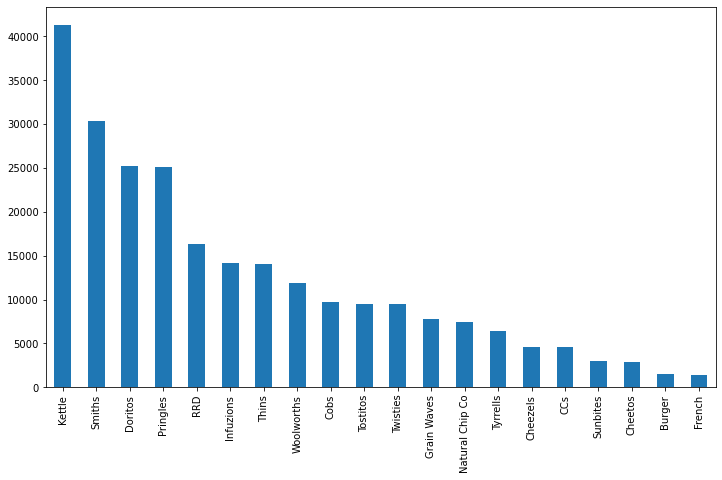

In [226]:
data["Cleaned_Brand_Names"].value_counts(ascending=False).plot.bar(figsize=(12,7))

From above graph we can say that the the kettle chips brand have highest count fallowed by Smiths

In [227]:
data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Cleaned_Brand_Names
0,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural Chip Co
1,1002,YOUNG SINGLES/COUPLES,Mainstream,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,RRD
2,1003,YOUNG FAMILIES,Budget,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives g,1,3.6,Grain Waves
3,1003,YOUNG FAMILIES,Budget,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,Natural Chip Co
4,1004,OLDER SINGLES/COUPLES,Mainstream,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,Woolworths


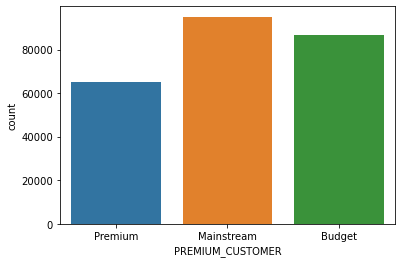

In [228]:
sns.countplot(data['PREMIUM_CUSTOMER'])

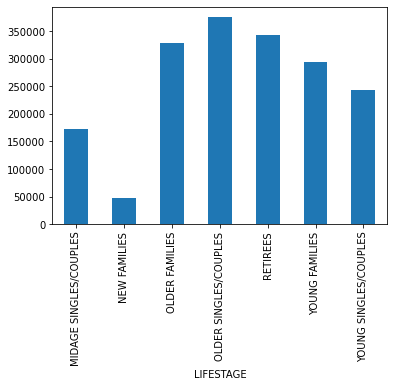

In [229]:
data.groupby(by ="LIFESTAGE").TOT_SALES.sum().plot(kind='bar')

In [230]:
group_data =pd.DataFrame(data.groupby(["LIFESTAGE","PREMIUM_CUSTOMER"])["TOT_SALES"].agg(["sum","mean"]))
group_data.sort_values(ascending =False,by="sum")

sum      mean
LIFESTAGE              PREMIUM_CUSTOMER                     
OLDER FAMILIES         Budget            156863.75  7.291241
YOUNG SINGLES/COUPLES  Mainstream        147582.20  7.551279
RETIREES               Mainstream        145168.95  7.269352
YOUNG FAMILIES         Budget            129717.95  7.302705
OLDER SINGLES/COUPLES  Budget            127833.60  7.444305
                       Mainstream        124648.50  7.306049
                       Premium           123531.55  7.460085
RETIREES               Budget            105916.30  7.445786
OLDER FAMILIES         Mainstream         96413.55  7.281440
RETIREES               Premium            91296.65  7.461315
YOUNG FAMILIES         Mainstream         86338.25  7.226772
MIDAGE SINGLES/COUPLES Mainstream         84734.25  7.637156
YOUNG FAMILIES         Premium            78571.70  7.285951
OLDER FAMILIES         Premium            75242.60  7.232779
YOUNG SINGLES/COUPLES  Budget             57122.10  6.663023
MIDAGE SINGLES/COUPLES Premium            54443.85  7.152371
YOUNG SINGLES/COUPLES  Premium            39052.30  6.673325
MIDAGE SINGLES/COUPLES Budget             33345.70  7.108442
NEW FAMILIES           Budget             20607.45  7.297256
                       Mainstream         15979.70  7.313364
                       Premium            10760.80  7.231720

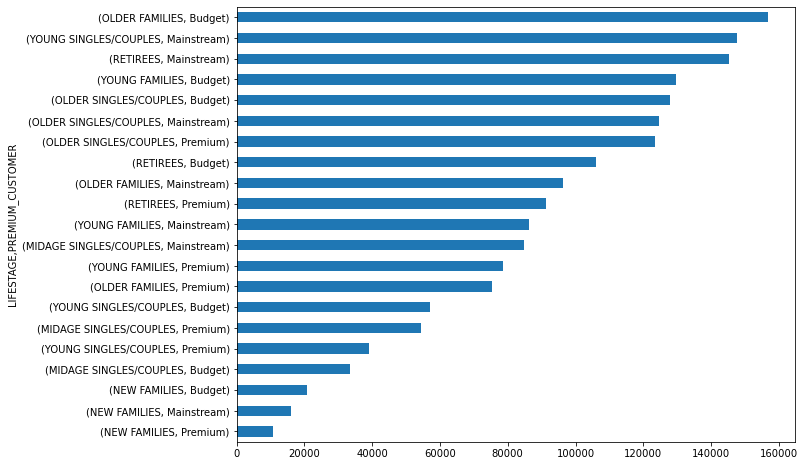

In [231]:
group_data["sum"].sort_values().plot.barh(figsize=(10,8
                                                  
                                                  ))

In [232]:
# population of customer
unique_cust =pd.DataFrame( data.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["LYLTY_CARD_NBR"].
                         nunique().sort_values(ascending=False))
unique_cust

LYLTY_CARD_NBR
LIFESTAGE              PREMIUM_CUSTOMER                
YOUNG SINGLES/COUPLES  Mainstream                  7917
RETIREES               Mainstream                  6358
OLDER SINGLES/COUPLES  Mainstream                  4858
                       Budget                      4849
                       Premium                     4682
OLDER FAMILIES         Budget                      4611
RETIREES               Budget                      4385
YOUNG FAMILIES         Budget                      3953
RETIREES               Premium                     3812
YOUNG SINGLES/COUPLES  Budget                      3647
MIDAGE SINGLES/COUPLES Mainstream                  3298
OLDER FAMILIES         Mainstream                  2788
YOUNG FAMILIES         Mainstream                  2685
YOUNG SINGLES/COUPLES  Premium                     2480
YOUNG FAMILIES         Premium                     2398
MIDAGE SINGLES/COUPLES Premium                     2369
OLDER FAMILIES         Premium                     2231
MIDAGE SINGLES/COUPLES Budget                      1474
NEW FAMILIES           Budget                      1087
                       Mainstream                   830
                       Premium                      575

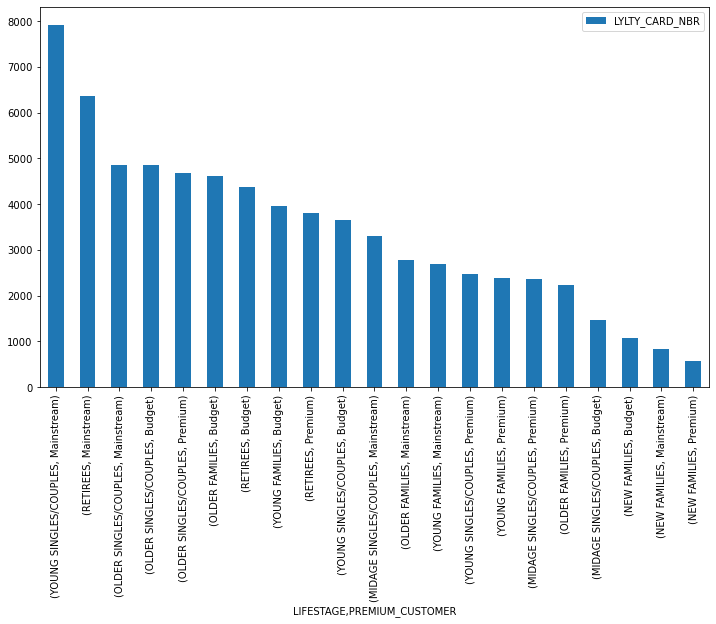

In [233]:
unique_cust.plot(kind="bar",figsize=(12,7))

In [234]:
freq_per_cust = data.groupby(["LYLTY_CARD_NBR", "LIFESTAGE", "PREMIUM_CUSTOMER"]).count()["DATE"]
freq_per_cust.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"]).agg(["mean", "count"]).sort_values(ascending=False, by="mean")

mean  count
LIFESTAGE              PREMIUM_CUSTOMER                 
OLDER FAMILIES         Mainstream        4.749283   2788
                       Budget            4.665799   4611
                       Premium           4.662931   2231
YOUNG FAMILIES         Premium           4.497081   2398
                       Budget            4.493549   3953
                       Mainstream        4.449534   2685
OLDER SINGLES/COUPLES  Budget            3.541349   4849
                       Premium           3.536736   4682
                       Mainstream        3.511939   4858
MIDAGE SINGLES/COUPLES Mainstream        3.364160   3298
RETIREES               Budget            3.244014   4385
MIDAGE SINGLES/COUPLES Premium           3.213170   2369
RETIREES               Premium           3.209864   3812
MIDAGE SINGLES/COUPLES Budget            3.182497   1474
RETIREES               Mainstream        3.140925   6358
NEW FAMILIES           Mainstream        2.632530    830
                       Budget            2.597976   1087
                       Premium           2.587826    575
YOUNG SINGLES/COUPLES  Mainstream        2.468612   7917
                       Premium           2.359677   2480
                       Budget            2.350699   3647

In [235]:
data.groupby(['Cleaned_Brand_Names'])['TOT_SALES'].agg(['sum']).sort_values(by ='sum',ascending=False)

,sum
Cleaned_Brand_Names,
Kettle,390239.8
Doritos,226329.9
Smiths,217486.0
Pringles,177655.5
Infuzions,99047.6
Thins,88852.5
RRD,87607.5
Twisties,81522.1
Tostitos,79789.6


========== YOUNG SINGLES/COUPLES - Premium ==========
134.0     537
150.0     896
175.0    1587
Name: Pack_Size, dtype: int64


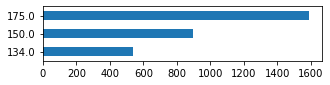

========== YOUNG SINGLES/COUPLES - Mainstream ==========
134.0    2315
150.0    2998
175.0    4928
Name: Pack_Size, dtype: int64


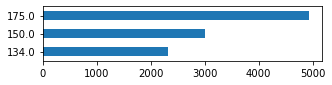

========== YOUNG SINGLES/COUPLES - Budget ==========
134.0     832
150.0    1325
175.0    2262
Name: Pack_Size, dtype: int64


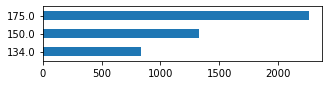

========== YOUNG FAMILIES - Premium ==========
134.0    1007
150.0    1697
175.0    2926
Name: Pack_Size, dtype: int64


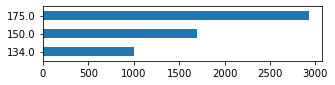

========== YOUNG FAMILIES - Mainstream ==========
134.0    1148
150.0    1927
175.0    3087
Name: Pack_Size, dtype: int64


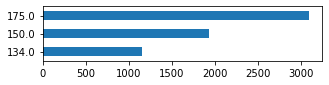

========== YOUNG FAMILIES - Budget ==========
134.0    1674
150.0    2749
175.0    4800
Name: Pack_Size, dtype: int64


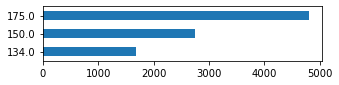

========== OLDER SINGLES/COUPLES - Premium ==========
134.0    1744
150.0    2672
175.0    4381
Name: Pack_Size, dtype: int64


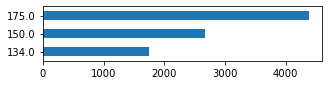

========== OLDER SINGLES/COUPLES - Mainstream ==========
134.0    1720
150.0    2660
175.0    4422
Name: Pack_Size, dtype: int64


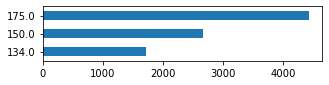

========== OLDER SINGLES/COUPLES - Budget ==========
134.0    1843
150.0    2726
175.0    4535
Name: Pack_Size, dtype: int64


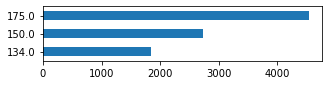

========== MIDAGE SINGLES/COUPLES - Premium ==========
134.0     781
150.0    1163
175.0    2034
Name: Pack_Size, dtype: int64


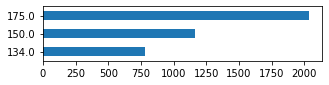

========== MIDAGE SINGLES/COUPLES - Mainstream ==========
134.0    1159
150.0    1714
175.0    2912
Name: Pack_Size, dtype: int64


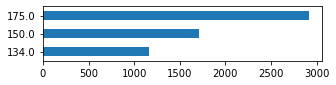

========== MIDAGE SINGLES/COUPLES - Budget ==========
134.0     449
150.0     746
175.0    1256
Name: Pack_Size, dtype: int64


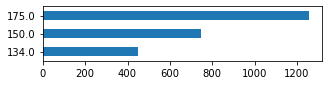

========== NEW FAMILIES - Premium ==========
134.0    165
150.0    225
175.0    371
Name: Pack_Size, dtype: int64


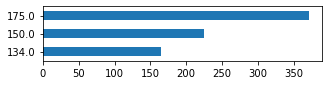

========== NEW FAMILIES - Mainstream ==========
134.0    224
150.0    362
175.0    579
Name: Pack_Size, dtype: int64


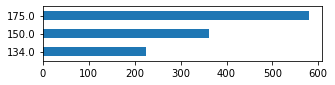

========== NEW FAMILIES - Budget ==========
134.0    309
150.0    425
175.0    763
Name: Pack_Size, dtype: int64


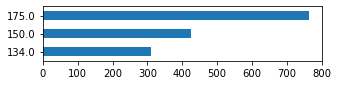

========== OLDER FAMILIES - Premium ==========
134.0    1014
150.0    1607
175.0    2747
Name: Pack_Size, dtype: int64


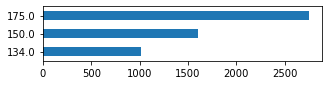

========== OLDER FAMILIES - Mainstream ==========
134.0    1234
150.0    2091
175.0    3489
Name: Pack_Size, dtype: int64


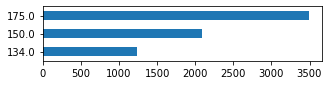

========== OLDER FAMILIES - Budget ==========
134.0    1996
150.0    3414
175.0    5662
Name: Pack_Size, dtype: int64


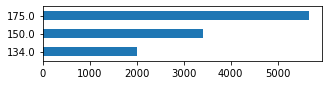

========== RETIREES - Premium ==========
134.0    1331
150.0    1883
175.0    3232
Name: Pack_Size, dtype: int64


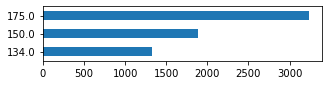

========== RETIREES - Mainstream ==========
134.0    2103
150.0    3183
175.0    5187
Name: Pack_Size, dtype: int64


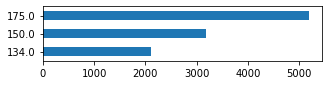

========== RETIREES - Budget ==========
134.0    1517
150.0    2242
175.0    3768
Name: Pack_Size, dtype: int64


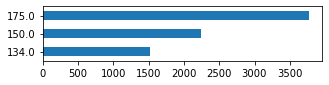

In [236]:
# see the most frequent bought chips packe

merged_pack = pd.concat([data, pack_sizes.rename("Pack_Size")], axis=1)

for stage in data["LIFESTAGE"].unique():
    for prem in data["PREMIUM_CUSTOMER"].unique():
        print('==========',stage, '-', prem,'==========')
        summary = merged_pack[(merged_pack["LIFESTAGE"] == stage) & (merged_pack["PREMIUM_CUSTOMER"] == prem)]["Pack_Size"].value_counts().head(3).sort_index()
        print(summary)
        plt.figure()
        summary.plot.barh(figsize=(5,1))
        plt.show()


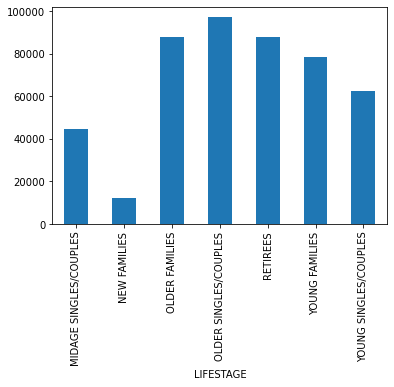

In [237]:
data.groupby("LIFESTAGE").PROD_QTY.agg('sum').plot(kind='bar')

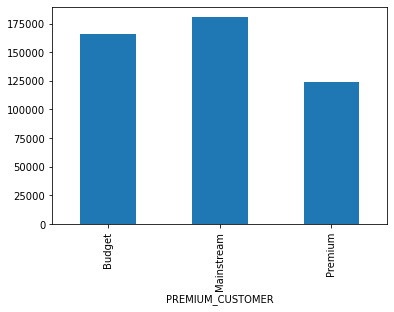

In [238]:
data.groupby("PREMIUM_CUSTOMER").PROD_QTY.agg('sum').plot(kind='bar')

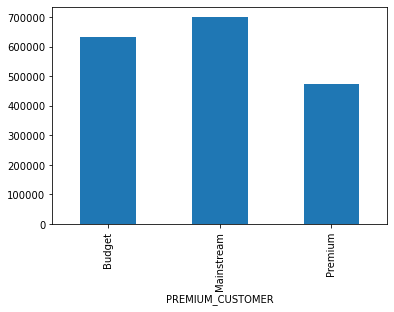

In [239]:
data.groupby("PREMIUM_CUSTOMER").TOT_SALES.agg('sum').plot(kind='bar')

# Insights

- Top 3 Total sales contrubutor segments are
   -    older singles/couples(budgest) 156863.75/$
   
   -    young singles/couples(Mainstream) 147582.20/$
   
   -    Retires(mainstream) 145168.95/$

- Mainstream have highest Total sales by Premium_customer wise 

- Mainstream have highest quantity of sales by Premium_customer wise

- overall older singles/couples have highest total sales

- Young Singles/Couples (Mainstream) has the highest population, followed by Retirees (Mainstream). Which explains their high total sales.

- Despite Older Families not having the highest population, they have the highest frequency of purchase, which contributes to their high total sales.

- Chips brand Kettle is dominating every segment as the most purchased brand, Doritos and Smiths comes after that.

- Most frequent chip size purchased is 175gr followed by the 150gr chip size for all segments.

# Recommendations

- older singles/couples

  - focus of budget
  
  - Strength: this is the group who buy most frequently, we can encourage by giving offers for buying more frequently
  
- young singles/couples 

 - focus on Mainstream
 
 - Strength: Population quantity. We can spend more effort on making sure our promotions reach them, and it reaches them frequently.

- Retires

  -  focus on mainstream
  
  - strength: 2nd in total sales and 3rd in populateion for buying product
  
- overall

 - All segments has Kettle as the most frequently purchased brand, and 175gr (regardless of brand) followed by 150gr as the preferred chip size.
 
 - When promoting chips in general to all segments it is good to take advantage of these two points.